# Introduction
In Part I, we collected our data and performed a little data cleaning. We then exported the cleaned DataFrames as CSVs.

In this Part, here's what you will do:
<ol><li>Read the cleaned CSVs into separate DataFrames</li><li>Perform univariate analysis for h1 and h2</li><li>Perform bivariate analysis for h1 and h2</li></ol>

<strong>Note: we'll analyze the CSVs on their own, i.e. separately first, before comparing them in the next Part. This part is also pretty long because we'll be analyzing two different datasets so take your time in understanding the visualizations that you make.</strong>

<strong>Note 2: have the publication you have handy, e.g., in a different tab or browser, so you can refer to the definitions of the columns</strong>

Useful readings on visualization: 
<a href = "https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed">Introduction to Data Visualization in Python</a> (run it in Incognito Mode if you face the paywall)

We highly recommend this reading if you haven't done visualization often enough.

### Step 1: Import the following libraries
- pandas as pd
- matplotlib.pyplot as plt
- seaborn as sns

In [1]:
# Step 1: Import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Read the CSVs from Part I as DataFrames
Let's read the CSVs as DataFrames. We'll perform EDA for both of these datasets.

In [2]:
# Step 2a: Read the cleaned h1.csv into a DataFrame

h1 = pd.read_csv("h1_clean.csv")

In [3]:
# Step 2b: Read the cleaned h2.csv into a DataFrame

h2 = pd.read_csv("h2_clean.csv")

# H1.csv
## Univariate analysis (UA)
In this section, we'll first work with h1.csv and examine the individual features through visualization.

Univariate analysis (UA) analyzes features on their own through plots such as histograms and countplots so that we can understand the distribution of the data and identify possible outliers or errors.

Do refer to the research publication mentioned in Part I so that you can appreciate features better.

### Step 3: Perform UA on IsCanceled with a countplot
First, we want to see the proportion of cancelled bookings vs non-cancelled bookings. To do that, we can use a countplot from the seaborn library.

What do you notice about the cancellations for h1?

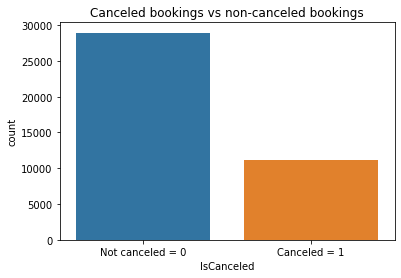

In [4]:
# Step 3: Plot a countplot using IsCanceled

ax = plt.subplot()
sns.countplot(h1["IsCanceled"])
ax.set_xticklabels(["Not canceled = 0", "Canceled = 1"])
plt.title("Canceled bookings vs non-canceled bookings")
plt.show()

### Step 4: Perform UA on LeadTime with a histogram
Let's take a look at the LeadTime with a histogram.

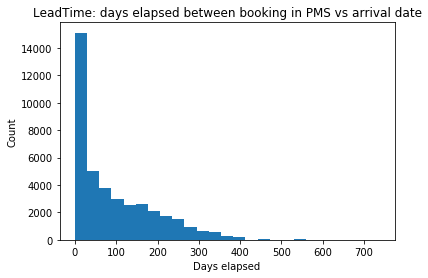

In [5]:
# Step 4: Plot a histogram using LeadTime

plt.close("all")
ax = plt.subplot()
plt.hist(h1["LeadTime"], bins = 25)
plt.title("LeadTime: days elapsed between booking in PMS vs arrival date")
plt.xlabel("Days elapsed")
plt.ylabel("Count")
plt.show()

### Step 5: Perform UA on ArrivalDateYear with a countplot
We'll take a look at the proportions of the ArrivalDateYear with a countplot, taking note of how many rows belong to which year. 

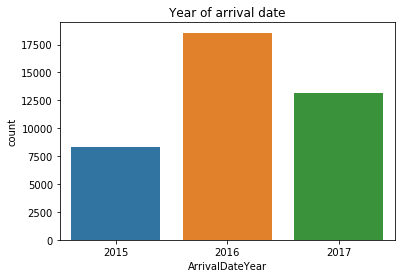

In [6]:
# Step 5: Plot a countplot using ArrivalDateYear

plt.close("all")
ax = plt.subplot()
sns.countplot(h1["ArrivalDateYear"])
plt.title("Year of arrival date")
plt.show()

### Step 6: Perform UA on ArrivalDateMonth with a countplot
Next, we take a look at the ArrivalDateMonth to see what the breakdown of the bookings are. 

Before you plot, hypothesize what kind of pattern you'd see!

<details>
    <summary><font color = 'green'>Click here once for a hint if your plot looks weird</font></summary>
    <div>
        <strong>Google "ordering axis of seaborn.countplot"</strong>
    </div>
    <div>
        <strong>Expanding the size of the plot helps too.</strong>
    </div>
</details>

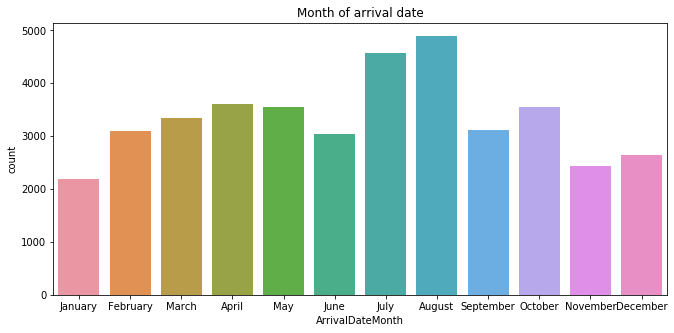

In [7]:
# Step 6: Plot a countplot using ArrivalDateMonth

month_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.close("all")
plt.figure(figsize=(11,5))
ax = plt.subplot()
sns.countplot(h1["ArrivalDateMonth"], order=month_list)
plt.title("Month of arrival date")
plt.show()

### Step 7: Perform UA on ArrivalDateWeekNumber with a countplot
Similarly, we want to see if there's a pattern in the ArrivalDateWeekNumber as well. 

It should be more similar since it's the granular form of ArrivalDataMonth. Let's take a look with a countplot.

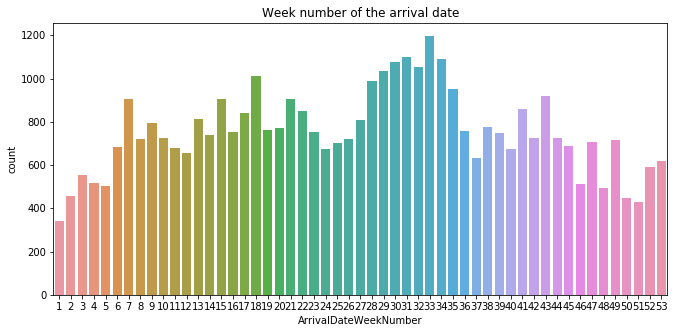

In [8]:
# Step 7: Plot a countplot using ArrivalDateWeekNumber

plt.close("all")
plt.figure(figsize=(11,5))
ax = plt.subplot()
sns.countplot(h1["ArrivalDateWeekNumber"])
plt.title("Week number of the arrival date")
plt.show()

### Step 8: Perform UA on Adults with a countplot/histogram
Let's take a look at the number of adults who book hotel rooms with a countplot. You can also try to use a histogram as well.

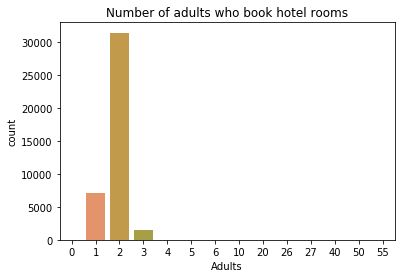

In [9]:
# Step 8: Plot a countplot/histogram using Adults

plt.close("all")
sns.countplot(h1["Adults"])
plt.title("Number of adults who book hotel rooms")
plt.show()

In [10]:
# Optional: Use the .describe method to get a summary statistic on 'Adults'

h1["Adults"].describe()

count    40060.000000
mean         1.867149
std          0.697285
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: Adults, dtype: float64

### Step 9: Perform UA on Children with a countplot/histogram
Similarly, let's take a look at the counts of children with a countplot to see what is the most common number of children brought by would-be customers.

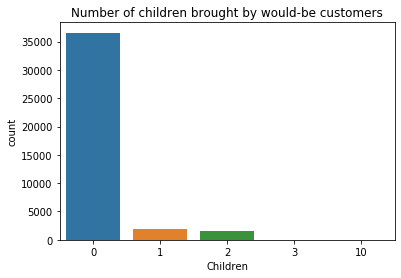

In [11]:
# Step 9: Plot a countplot/histogram using Children

plt.close("all")
sns.countplot(h1["Children"])
plt.title("Number of children brought by would-be customers")
plt.show()

### Step 10: Perform UA on Babies with a countplot/histogram

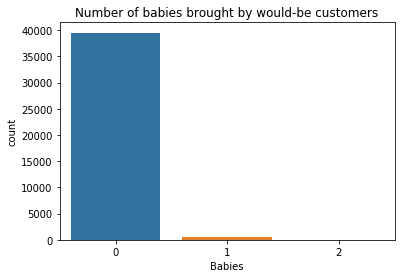

In [12]:
# Step 10: Plot a countplot using Babies

plt.close("all")
sns.countplot(h1["Babies"])
plt.title("Number of babies brought by would-be customers")
plt.show()

### Step 11: Perform UA on Meal with a countplot
Meal is where the type of meal is booked. We should anticipate four kinds of categories so let's use a countplot to visualize them. 

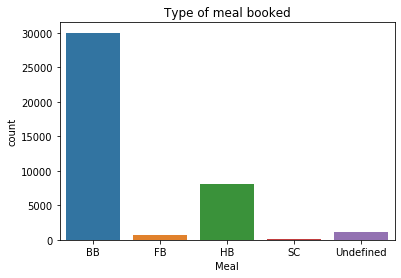


Undefined/SC – no meal package;
BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner)    
      


In [13]:
# Step 11: Plot a countplot using Meal

plt.close("all")
sns.countplot(h1["Meal"])
plt.title("Type of meal booked")
plt.show()

print("""
Undefined/SC – no meal package;
BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner)    
      """)

### Step 12: Perform UA on Country with value counts
Retrieve the 'Country' column data, and we'll use the value_counts method to summarize the counts of the categorical values in order.

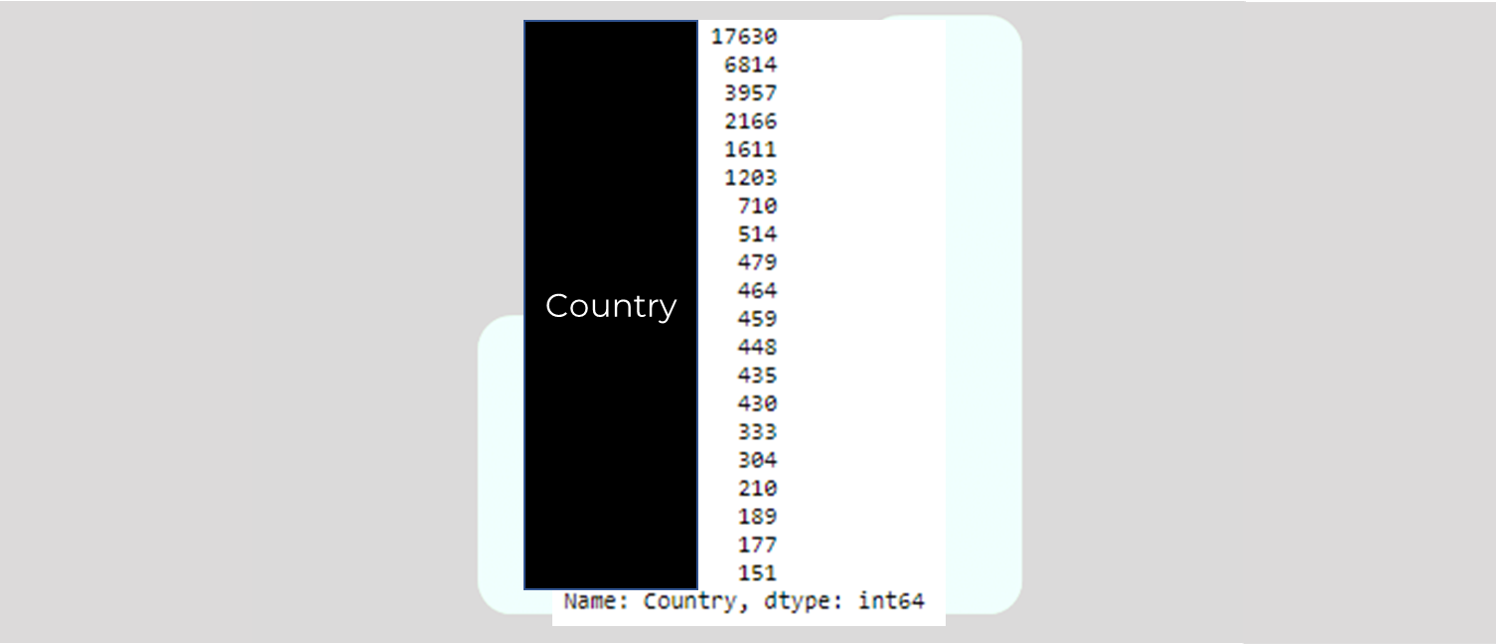

It's going to be a long list, so <strong>slice</strong> the first 20 items to get the top 20 countries present. 

Where do most of the visitors come from?

<details>
    <summary><font color = 'green'>Click here once for a hint</font></summary>
    <div>
        <strong>Google "value counts pandas"</strong>
    </div>
</details>

In [14]:
# Step 12: Use a value_counts on Country

h1["Country"].value_counts().iloc[0:25]

PRT        17630
GBR         6814
ESP         3957
IRL         2166
FRA         1611
DEU         1203
CN           710
NLD          514
USA          479
Unknown      464
ITA          459
BEL          448
CHE          435
BRA          430
POL          333
SWE          304
AUT          210
RUS          189
ROU          177
FIN          151
CHN          134
NOR          123
AUS           87
LUX           80
MAR           75
Name: Country, dtype: int64

### Step 13: Perform UA on MarketSegment with a countplot
We want to also see what kinds of people book rooms in the dataset. For this, we'll use a countplot on MarketSegment. 

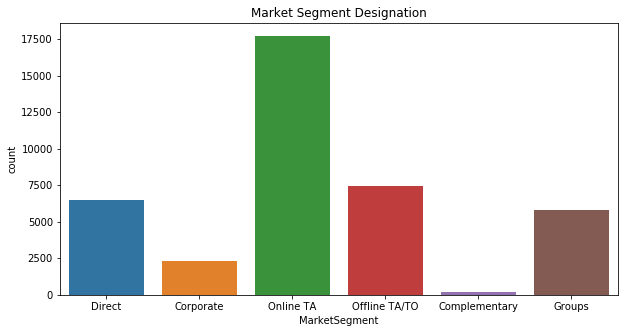

TA = Travel Agents
TO = Tour Operator


In [15]:
# Step 13: Plot a countplot using MarketSegment

plt.close("all")
plt.figure(figsize=(10,5))
sns.countplot(h1["MarketSegment"])
plt.title("Market Segment Designation")
plt.show()

print("TA = Travel Agents")
print("TO = Tour Operator")

### Step 14: Perform UA on DistributionChannel with a countplot
Where <em>are</em> all these customers coming from? We can find out by examining the DistributionChannel with a countplot as well.

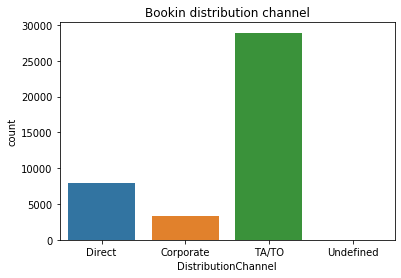

TA = Travel Agents
TO = Tour Operator


In [16]:
# Step 14: Plot a countplot using DistributionChannel

plt.close("all")
sns.countplot(h1["DistributionChannel"])
plt.title("Bookin distribution channel")
plt.show()

print("TA = Travel Agents")
print("TO = Tour Operator")

### Step 15: Perform UA on IsRepeatedGuest with a countplot
How prevalent are repeat customers in the dataset? We can find that answer in IsRepeatedGuest.

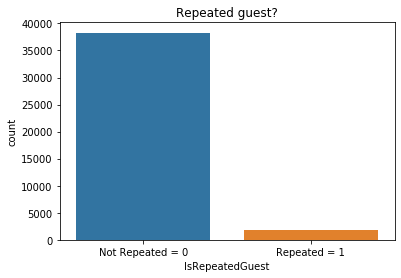

In [17]:
# Step 15: Plot a countplot using IsRepeatedGuest

plt.close("all")
ax = plt.subplot()
sns.countplot(h1["IsRepeatedGuest"])
plt.title("Repeated guest?")
ax.set_xticklabels(["Not Repeated = 0", "Repeated = 1"])
plt.show()

### Step 16: Perform UA on PreviousCancellations with a countplot
This feature indicates the distribution of the number of previous cancellations by the booking.

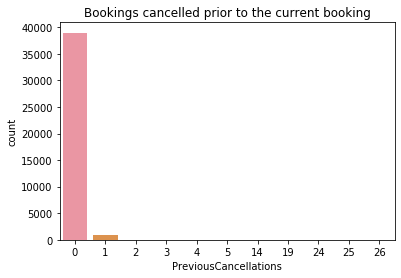

In [18]:
# Step 16: Plot a countplot using PreviousCancellations

plt.close("all")
sns.countplot(h1["PreviousCancellations"])
plt.title("Bookings cancelled prior to the current booking")
plt.show()

### Step 17: Perform UA on PreviousBookingsNotCanceled with a countplot
This is kind of the opposite of the Step 16, i.e. "Number of previous bookings not cancelled by the customer prior to the current booking".

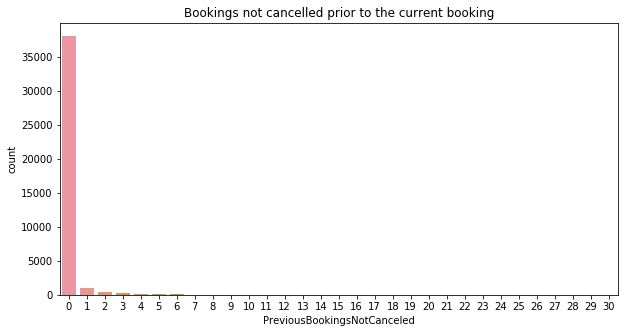

In [19]:
# Step 17: Plot a countplot using PreviousBookingsNotCanceled

plt.close("all")
plt.figure(figsize=(10,5))
sns.countplot(h1["PreviousBookingsNotCanceled"])
plt.title("Bookings not cancelled prior to the current booking")
plt.show()

### Step 18: Perform UA on ReservedRoomType with a countplot
We look at the kinds of rooms reserved. 

As mentioned in the publication, the room types are anonymized but it'd be good to examine the distribution of the kinds of rooms nonetheless. 

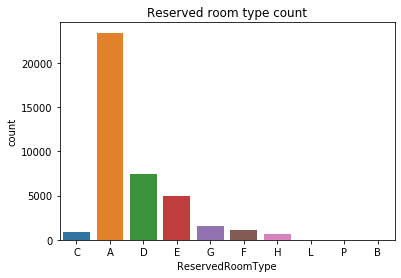

Room types are anonymized


array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [20]:
# Step 18: Plot a countplot using ReservedRoomType

plt.close("all")
sns.countplot(h1["ReservedRoomType"])
plt.title("Reserved room type count")
plt.show()

print("Room types are anonymized")
h1.ReservedRoomType.unique()

### Step 19: Perform UA on AssignedRoomType with a countplot
The rooms that eventually get assigned to customers may be different from the ReservedRoomType. 

Let's see if the distribution is similar to the one you see in Step 18.

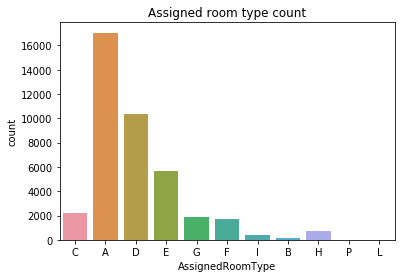

In [21]:
# Step 19: Plot a countplot using AssignedRoomType

plt.close("all")
sns.countplot(h1["AssignedRoomType"])
plt.title("Assigned room type count")
plt.show()

### Step 20: Perform UA on BookingChanges with a countplot/histogram
How many changes happen by customers? We can also check this out with a countplot/histogram on BookingChanges.

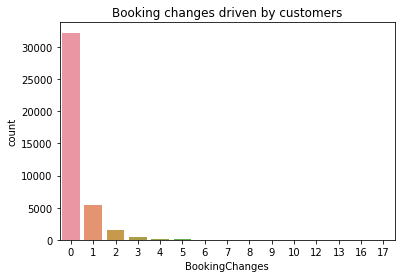

In [22]:
# Step 20: Plot a histogram using BookingChanges

plt.close("all")
sns.countplot(h1["BookingChanges"])
plt.title("Booking changes driven by customers")
plt.show()

### Step 21: Perform UA on DepositType with a countplot
How are the customers paying? We do this with by looking at the DepositeType feature with a countplot. 

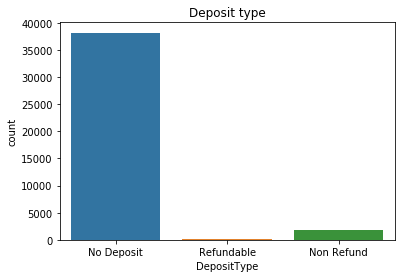

In [23]:
# Step 21: Plot a countplot using DepositType

plt.close("all")
sns.countplot(h1["DepositType"])
plt.title("Deposit type")
plt.show()

### Step 22: Get the top 20 Agent with value count
Some of the bookings are done with agents - let's see who are the top 20 agents involved.

You may see something interesting - what do you think it is?

<details>
    <summary><font color = 'green'>Click here once for clue</font></summary>
    <div>
        <strong>What do you see at the second highest "Agent"?</strong>
    </div>
</details>

In [24]:
# Step 22: Take the top 20 from the value count

print(h1.Agent.value_counts().head(25))
print("NULL = Booking made without an agent")

        240    13905
       NULL     8209
        250     2869
        241     1721
         40     1002
        314      927
        242      779
          6      607
         96      537
        243      514
        298      472
        171      363
        273      349
        177      327
        196      291
        134      287
          8      278
        315      256
         15      242
         38      236
          5      228
        115      225
        251      220
         68      211
        175      195
Name: Agent, dtype: int64
NULL = Booking made without an agent


### Step 23: Perform UA on DaysInWaitingList with a histogram
What's the distribution of the number of days someone waits? Plot a histogram to find out! 

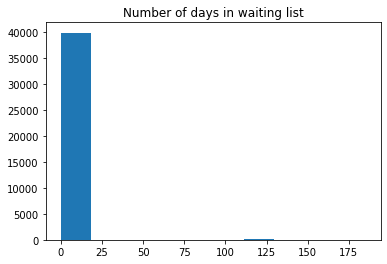

count    40060.000000
mean         0.527758
std          7.428580
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        185.000000
Name: DaysInWaitingList, dtype: float64

In [25]:
# Step 23: Plot a histogram using DaysInWaitingList

plt.close("all")
plt.hist(h1["DaysInWaitingList"])
plt.title("Number of days in waiting list")
plt.show()

h1.DaysInWaitingList.describe()

### Step 24: Perform UA on CustomerType with a countplot
What are the kinds of people making the bookings - we can find out with a countplot on CustomerType. 

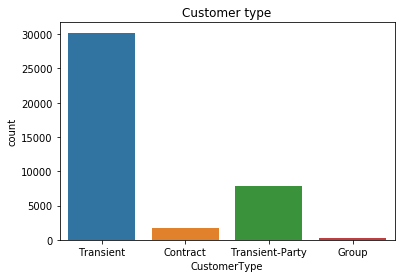

In [26]:
# Step 24: Plot a countplot using CustomerType

plt.close("all")
sns.countplot(h1["CustomerType"])
plt.title("Customer type")
plt.show()

### Step 25: Perform UA on ADR with a histogram
ADR, or average daily rate, is defined as a metric that is "calculated by dividing the sum of all lodging transactions by the total number of staying nights".

It's used commonly as a KPI for hotel performance. 

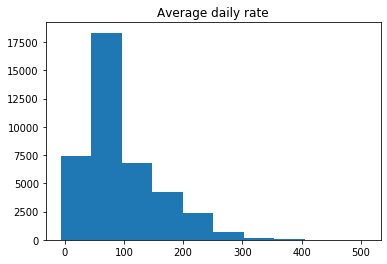

In [27]:
# Step 25: Plot a histogram using ADR

plt.close("all")
plt.hist(h1["ADR"])
plt.title("Average daily rate")
plt.show()

### Step 26: Perform UA on RequiredCarParkingSpaces with a countplot
This is a feature that indicates the number of parking spaces the customer needs. 

You can either use a countplot or go with a value count.

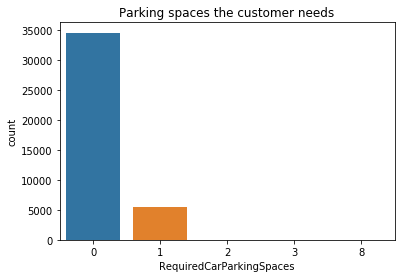

In [28]:
# Step 26: Plot a histogram using RequiredCarParkingSpaces

plt.close("all")
sns.countplot(h1["RequiredCarParkingSpaces"])
plt.title("Parking spaces the customer needs")
plt.show()

### Step 27: Perform UA on TotalOfSpecialRequests with a countplot
Are our customers okay, or fussy as hell? Find out with a countplot on TotalOfSpecialRequests. 

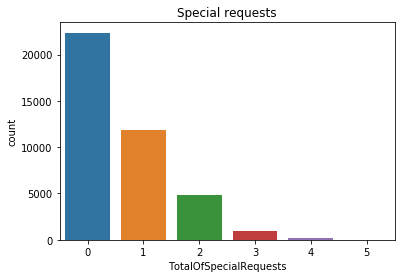

In [29]:
# Step 27: Plot a histogram using TotalOfSpecialRequests

plt.close("all")
sns.countplot(h1["TotalOfSpecialRequests"])
plt.title("Special requests")
plt.show()

### End of UA for H1.csv
We have examined quite a lot of columns! It's a long process, well done for perservering.

It is completely necessary because it'd be hard to appreciate and understand your data otherwise. This is also helpful when/if we need to do feature engineering later on to derive, subtract, or modify features. 

## Bivariate analysis
Now that we're done with univariate analysis, let's come up with a few hypotheses on whether there's a correlation between certain features and cancellations.

### Step 28: Perform BA on LeadTime vs IsCanceled with a boxplot
<blockquote>Is a long lead time correlated to cancellation?</blockquote>

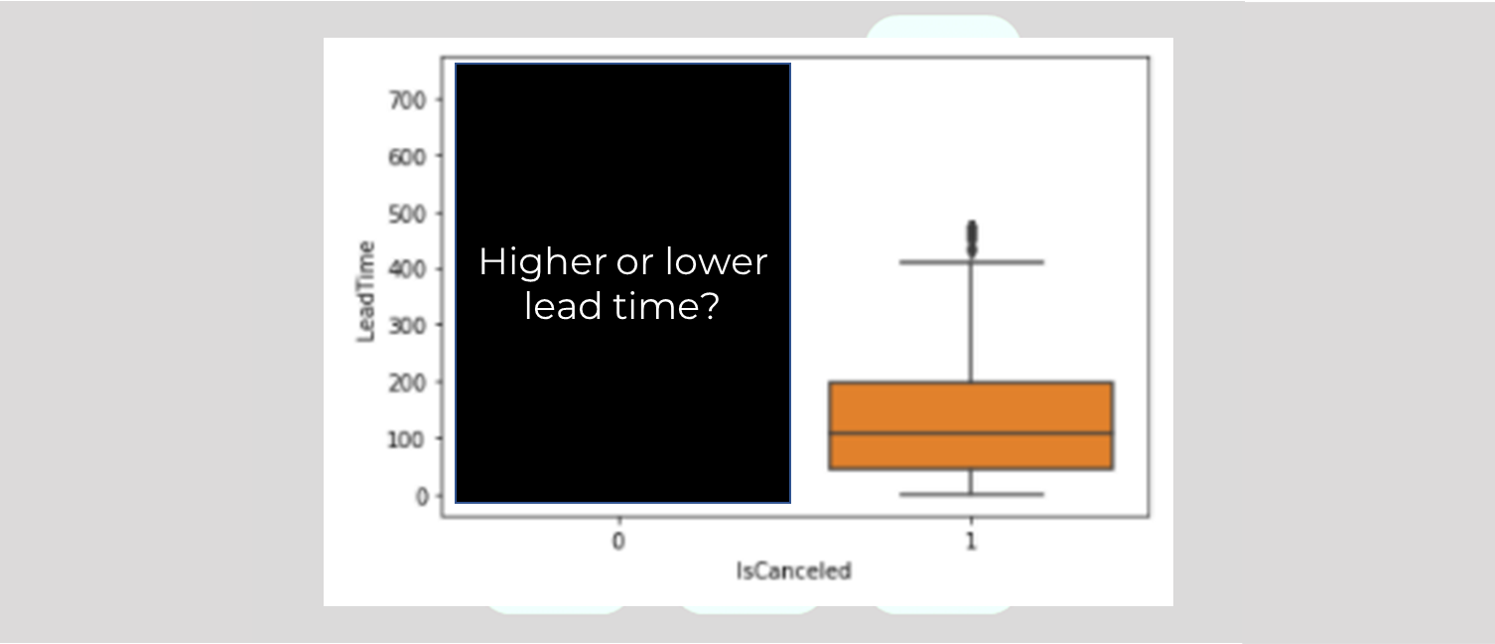

To test this hypothesis, we can plot a boxplot and visually inspect if there's a qualitative difference between the lead times of cancelled and normal bookings. 

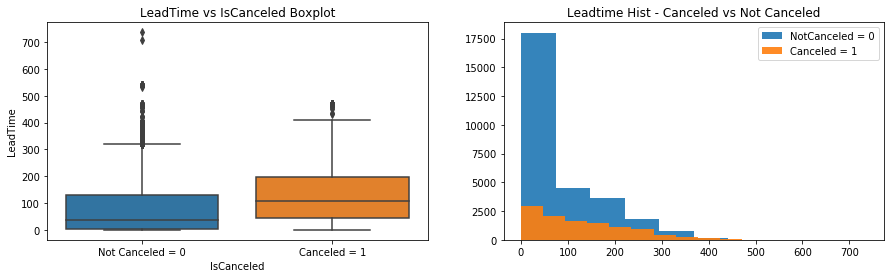

In [30]:
# Step 28: Plot a boxplot using LeadTime vs IsCanceled

# Boxplot
plt.close("all")
plt.figure(figsize=(15,4))
ax = plt.subplot(1,2,1)
sns.boxplot(x = h1["IsCanceled"], y = h1["LeadTime"])
ax.set_xticklabels(["Not Canceled = 0", "Canceled = 1"])
plt.title("LeadTime vs IsCanceled Boxplot")

# Histogram 
plt.subplot(1,2,2)
plt.hist(h1.LeadTime[h1.IsCanceled == 0], alpha=0.9)
plt.hist(h1.LeadTime[h1.IsCanceled == 1], alpha=0.9)
plt.legend(["NotCanceled = 0", "Canceled = 1"])
plt.title("Leadtime Hist - Canceled vs Not Canceled")
plt.show()

### [Optional] Perform a Mann-Whitney U test 
Assuming that we can visually inspect the difference between 0 and 1 for IsCancelled with respect to lead time, how do we really know for sure that the differences are statistically significant?

From Step 4, we have seen that the values for LeadTime are not normally distributed. This means we can't use parametric tests such as t-tests. 

As such, we'll use a Mann-Whitney U test. You can import the stats library from the scipy library.

Conduct this test on two lists - first list are lead times for when isCancelled is 0, and lead times for when isCancelled is 1.

<details>
    <summary><font color = 'green'>Click here once for steps you'll need</font></summary>
    <div>
        <ol>
            <li>Filter DataFrame based on IsCancelled == 0</li>
            <li>Get the values in LeadTime and save it in a variable</li>
            <li>Filter DataFrame based on IsCancelled == 1</li>
            <li>Get the values in LeadTime and save it in another variable</li>
            <li>Import stats from scipy</li>
            <li>Use the .mannwhitneyu method, using variables from 2 and 4</li>
            <li>Reject null hypothesis that both samples come from the same distribution if p < 0.05</li>
        </ol>
    </div>
</details>

In [31]:
# [Optional] Conduct a statistical test of difference using Mann-Whitney U test

import scipy.stats as stats
statistic, pval = stats.mannwhitneyu(h1.LeadTime[h1.IsCanceled == 0], h1.LeadTime[h1.IsCanceled == 1])
print("p_value = " + str(pval))
print("\n")
print("The leadtimes for these two categories are significantly different")

p_value = 0.0


The leadtimes for these two categories are significantly different


### Step 29: Perform BA on DaysInWaitingList vs IsCanceled with a scatterplot
<blockquote>What happens when you keep people waiting in line for their booking?</blockquote>

We can examine this by plotting a boxplot between DaysInWaitingList and IsCanceled.

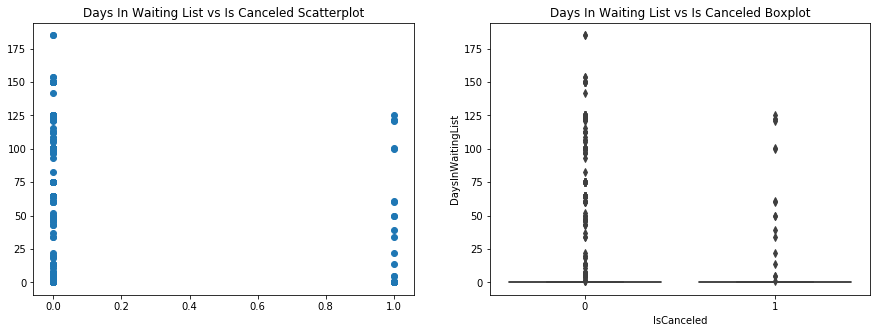

In [32]:
# Step 29: Plot a boxplot using DaysInWaitingList vs IsCanceled

# Scatterplot
plt.close("all")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(h1["IsCanceled"], h1["DaysInWaitingList"])
plt.title("Days In Waiting List vs Is Canceled Scatterplot")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x = h1["IsCanceled"], y = h1["DaysInWaitingList"])
plt.title("Days In Waiting List vs Is Canceled Boxplot")
plt.show()

### [Optional] Conduct a Mann-Whitney U test
If you plot the boxplot, you'll see that it's hard to qualitatitely tell the two boxes apart.

Conduct a Mann-Whitney U test instead and see if there's a difference.

In [33]:
# Optional: Conduct a Mann-Whitney U test

import scipy.stats as stats
statistic, pval = stats.mannwhitneyu(h1.DaysInWaitingList[h1.IsCanceled == 0], h1.DaysInWaitingList[h1.IsCanceled == 1])
print("p_value = " + str(pval))

p_value = 2.158153730437505e-14


### Try other hypotheses
Be creative! See if there are any other relationships you can unearth between the features, not just between one feature and IsCancelled.

In [219]:
# Try other hypotheses here

# Chi2 Test - ArrivalDateMonth (Catergorical 12) vs IsCanceled (Categorical 2)
print("CHI2 TEST - ARRIVAL DATE MONTH vs CANCELED")

h1["is_canceled"] = h1.IsCanceled.apply(lambda x: "Canceled" if x == 1 else "Not Canceled")
month_cancelation_counts = h1.groupby(["ArrivalDateMonth", "is_canceled"]).IsCanceled.count().reset_index()
month_cancelation_counts_pivot = month_cancelation_counts.pivot(columns = "is_canceled", index = "ArrivalDateMonth", values = "IsCanceled")

month_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_cancelation_counts_pivot = month_cancelation_counts_pivot.reindex(month_list)

month_cancelation_counts_pivot["Percent_Canceled"] = month_cancelation_counts_pivot["Canceled"] / (month_cancelation_counts_pivot["Canceled"] + month_cancelation_counts_pivot["Not Canceled"])
print(month_cancelation_counts_pivot)

from scipy.stats import chi2_contingency
contingency = month_cancelation_counts_pivot
chi2, pval, dof, expected = chi2_contingency(contingency)
print("p_val = " + str(pval))
print("\n")


# Anova Test - Country (Categorical 126) vs ADR (Numeric)
print("ANOVA TEST - COUNTRY VS ADR")
adr_country_cols = h1[["Country", "ADR"]]
adr_countries_group = adr_country_cols.groupby(["Country"]).sum().reset_index()
adr_countries_sorted = adr_countries_group.sort_values(by=["ADR"], ascending=False)
print(top_adr_countries_sorted.head(3))

prt_adr = adr_country_cols[adr_country_cols.Country == 'PRT']
gbr_adr = adr_country_cols[adr_country_cols.Country == 'GBR']
esp_adr = adr_country_cols[adr_country_cols.Country == 'ESP']

from scipy.stats import f_oneway
fstat, pval = f_oneway(prt_adr["ADR"], gbr_adr["ADR"], esp_adr["ADR"])
print("p_val = " + str(pval))


CHI2 TEST - ARRIVAL DATE MONTH vs CANCELED
is_canceled       Canceled  Not Canceled  Percent_Canceled
ArrivalDateMonth                                          
January                325          1868          0.148199
February               795          2308          0.256204
March                  763          2573          0.228717
April                 1059          2550          0.293433
May                   1024          2535          0.287721
June                  1007          2038          0.330706
July                  1436          3137          0.314017
August                1637          3257          0.334491
September             1006          2102          0.323681
October                978          2577          0.275105
November               461          1976          0.189167
December               631          2017          0.238293
p_val = 1.4906188387872604e-99


ANOVA TEST - COUNTRY VS ADR
   Country         ADR
95     PRT  1624962.55
45     GBR   550975.70
4

# H2.csv
What a long session! Now that we're done for H1.csv, it's time for H2.csv. Don't groan, this is useful later on!

You're halfway there, yes there's a lot of visualizations ahead, but you can do it!

### Step 30: Repeat Steps 3 - 29 with h2.csv data
We don't like to bore you with the same instructions again and again, but by now you should know the drill. 

We will repeat Steps 3 to 29, and examine the same distibributions that we did for h1.csv. 

In [35]:
# Step 30: Repeat Steps 3 - 29

In [36]:
# Step 30: Repeat Steps 3 - 29

In [37]:
# Step 30: Repeat Steps 3 - 29

In [38]:
# Step 30: Repeat Steps 3 - 29

In [39]:
# Step 30: Repeat Steps 3 - 29

### End of Part II
Well done for getting this far! It was long, but as you did the UA and BA for h2.csv data, we hope that you noticed the difference in the distributions. 

This is important because in Part III, we will directly compare some of the features between the two datasets, along with statistical tests.

Take a break, you deserve it!